# Multi Layer Perceptron - MNIST

In [1]:
import matplotlib.pyplot as plt
import torchvision

mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([60000, 28, 28])
torch.Size([60000])


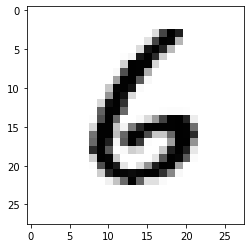

tensor(6)


In [6]:
print(mnist.data.size())
print(mnist.targets.size())

num = 6000
plt.imshow(
    mnist.data[num],
    cmap="Greys", interpolation="nearest")
plt.show() 

print(mnist.targets[num])

In [3]:
# 관련 패키지 import 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

In [7]:
# Device configuration, gpu 사용 가능한 경우 device를 gpu로 설정하고 사용 불가능하면 cpu로 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [10]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [8]:
# 파이토치에서 제공하는 MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, 
                                           transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, 
                                          transform=transforms.ToTensor())

In [11]:
# 배치 단위로 데이터를 처리해주는 Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

In [12]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, num_classes)
    
  def forward(self, x):
    out = F.relu(self.fc1(x))
    out = F.relu(self.fc2(out))
    out = self.fc3(out)
    return out

In [13]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device) # 모델을 지정한 device로 올려줌 

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# model.parameters -> 가중치 w들을 의미 

In [15]:
loss_arr = []
total_step = len(train_loader)

In [16]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # Move tensors to the configured device
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
		# Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
		# Backward and optimize
    optimizer.zero_grad() # iteration 마다 gradient를 0으로 초기화
    loss.backward() # 가중치 w에 대해 loss를 미분
    optimizer.step() # 가중치들을 업데이트

    if (i+1) % 100 == 0:
      loss_arr.append(loss.item())
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
          .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.3100
Epoch [1/5], Step [200/600], Loss: 0.1843
Epoch [1/5], Step [300/600], Loss: 0.1234
Epoch [1/5], Step [400/600], Loss: 0.1244
Epoch [1/5], Step [500/600], Loss: 0.1690
Epoch [1/5], Step [600/600], Loss: 0.1044
Epoch [2/5], Step [100/600], Loss: 0.1118
Epoch [2/5], Step [200/600], Loss: 0.0809
Epoch [2/5], Step [300/600], Loss: 0.0941
Epoch [2/5], Step [400/600], Loss: 0.0674
Epoch [2/5], Step [500/600], Loss: 0.0304
Epoch [2/5], Step [600/600], Loss: 0.0362
Epoch [3/5], Step [100/600], Loss: 0.0557
Epoch [3/5], Step [200/600], Loss: 0.0304
Epoch [3/5], Step [300/600], Loss: 0.0378
Epoch [3/5], Step [400/600], Loss: 0.0856
Epoch [3/5], Step [500/600], Loss: 0.0444
Epoch [3/5], Step [600/600], Loss: 0.0392
Epoch [4/5], Step [100/600], Loss: 0.0530
Epoch [4/5], Step [200/600], Loss: 0.0424
Epoch [4/5], Step [300/600], Loss: 0.0160
Epoch [4/5], Step [400/600], Loss: 0.0140
Epoch [4/5], Step [500/600], Loss: 0.0148
Epoch [4/5], Step [600/600], Loss:

In [17]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device) # 데이터를 장치에 올림
    labels = labels.to(device)
    outputs = model(images)
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 99.0 %


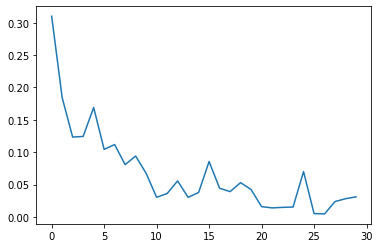

In [18]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')
# torch.save(model.state_dict(), '/content/drive/MyDrive/model.ckpt')
plt.plot(loss_arr)
plt.show()